# 문제 정의
- 문제의 종류 
  - 여러 입력 파라미터로부터 당뇨병 수치를 예측하는 Linear Regression 문제
- 입력 데이터
  - age : 나이
  - sex : 성별
  - bmi : 체질량지수
  - bp : 평균 혈압
  - s1 : 총 혈청 콜레스테롤, tc, total serum cholesterol
  - s2 : 저밀도 지질 단백질, ldl, low-density lipoproteins
  - s3 : 고밀도 지질 단백질, hdl, high-density lipoproteins
  - s4 : 총 콜레스테롤, tch, total cholesterol / HDL
  - s5 : ltg, possibly log of serum triglycerides level
  - s6 : 혈당 수치, glu, blood sugar level
- 출력 데이터
  - 예상 당뇨병 수치

# 데이터 수집 및 레이블링(과정1)
- sklearn.datasets 패키지의 data와 label이 정리된 diabetes dataset 사용

# 데이터 EDA 및 전처리(과정1~4)
- 데이터 EDA
  - 데이터 설명
  - 데이터 차원
  - 데이터 수치 범위
  - 데이터 타입
  - 공백 여부
  - 상관관계
- 데이터 전처리
  - train/test 데이터셋 분배

# 가설 및 학습 모델 설정(과정(5~7)
- 가설 수립
- 학습 파라미터 설정 및 학습 수행

# 학습 및 평가(과정8~11)
- train 데이터셋을 이용한 모델 학습
- test 데이터셋 평가

### 1. 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

In [ ]:
diabetes = load_diabetes()

df_X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_Y = pd.DataFrame(data=diabetes.target, columns=['target'])

df = pd.concat([df_X, df_Y], axis=1)
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
print(df.shape)

(442, 11)


### 데이터 EDA
- 데이터 설명
  - 입력 데이터
    - age : 나이
    - sex : 성별
    - bmi : 체질량지수
    - bp : 평균 혈압
    - s1 : 총 혈청 콜레스테롤, tc, total serum cholesterol
    - s2 : 저밀도 지질 단백질, ldl, low-density lipoproteins
    - s3 : 고밀도 지질 단백질, hdl, high-density lipoproteins
    - s4 : 총 콜레스테롤, tch, total cholesterol / HDL
    - s5 : ltg, possibly log of serum triglycerides level
    - s6 : 혈당 수치, glu, blood sugar level
  - 출력 데이터
    - 예상 당뇨병 수치
- 데이터 차원
  - 442 by 11
  - 442개 샘플 by (10개 항목의 input 데이터 + target 데이터)
- 데이터 수치 범위
  - 평균 값을 중심으로 표준편차로 스케일링 됨.
- 데이터 타입
  - 입력 데이터 : 소수형 자료
  - 출력 데이터 : 정수형 자료
- 공백 여부 
  - 공백 없음.
- 상관관계
  - target에 대하여 성별을 제외하고는 소숫점 1자리 이상의 상관관계를 나타냄.
  - s3(고밀도 지질 단백질)만 음의 상관관계를 나타냄.
  - 위키백과를 찾아보니 고밀도 지질 단백질이 높을수록 심장이 건강하다고 함.
  - 다른 파라미터와는 반대로 건강함을 나타내는 지표인듯 함.  
  - target에 대한 상관관계뿐만 아니라 성별과 s3를 제외한 파라미터는 서로간의 상관관계도 높게 나타남.
  - 파라미터끼리 깊은 연관이 있는듯 함.  

### 데이터 전처리
- 데이터 numpy array 변환 후 train/test 데이터셋을 랜덤 셔플링 후 8:2로 배분함.
- train/test 데이터셋의 배분은 보통 7:3 근처에서 이루어지는 것 같음.

In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
print(diabetes.data[0])
print("샘플 수:", diabetes.data.shape[0])
print("입력 차원 수:", diabetes.data.shape[1])

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
샘플 수: 442
입력 차원 수: 10


In [ ]:
print(diabetes.target)
print("타겟 차원:", diabetes.target.shape)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [ ]:
print(diabetes.feature_names)
print(len(diabetes.feature_names))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
10


In [ ]:
print(diabetes.data_filename)
print(diabetes.target_filename)

diabetes_data.csv.gz
diabetes_target.csv.gz


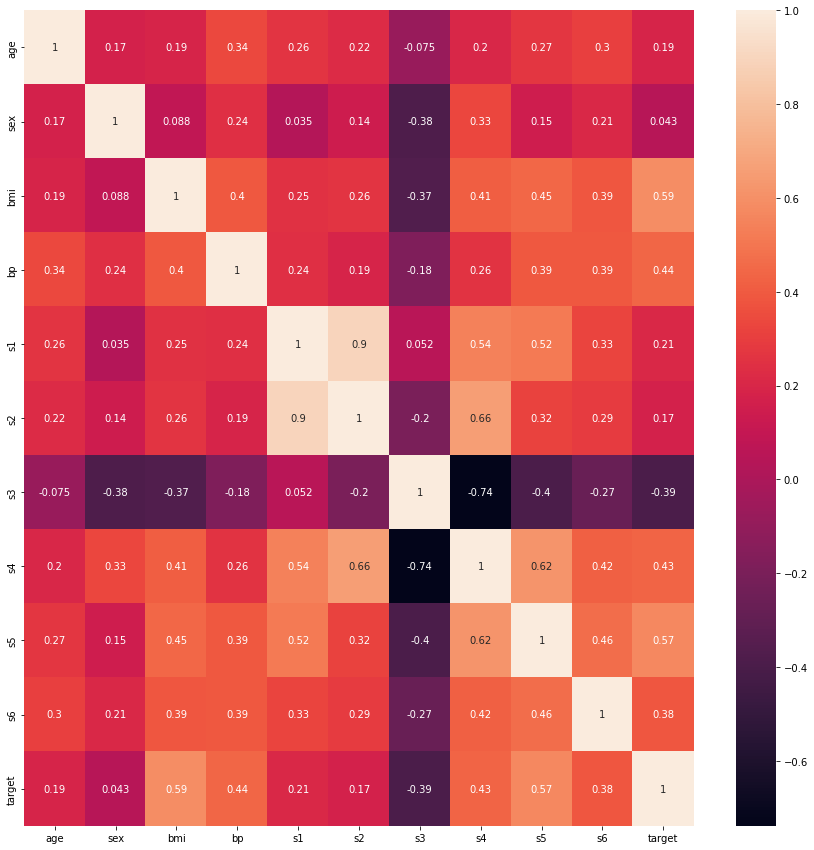

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

### 2. 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [ ]:
df_X = df_X.to_numpy()
print(type(df_X))

<class 'numpy.ndarray'>


### 3. 모델에 예측할 데이터 y 준비하기
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [ ]:
df_Y = df_Y.to_numpy()
print(type(df_Y))

<class 'numpy.ndarray'>


### 4. train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=.2, random_state=10)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353, 1)
(89, 10) (89, 1)


### 가설
- 사전 정보로 정확성을 떠나 많은 사람들이 아래와 같은 의학 지식을 가지고 있음.
- 나이가 많아지면 몸이 약해지고 병이 늘어난다.
- 체중이 높을수록 건강이 좋지 않다.
- 설탕이나 나쁜 지방의 섭취는 체중, 혈압, 혈당, 콜레스테롤 등을 증가시키며 질병을 유발한다.
- 일부 좋은 콜레스테롤의 섭취는 건강에 좋다.
- 위의 사전 정보와 상관관계도를 보아 학습의 입력 파라미터를 s3, 나이, 나머지 파라미터들(서로간의 상관관계가 보이기 대문에 이들 중 일부 선택)로 설정한다.
- 처음 학습 과정에서는 모든 파라미터를 입력한다.

### 학습 모델 설정
- 10 by 1의 FCNN 사용
- Linear Regression이기 때문에 활성화 함수는 사용하지 않음.
- loss function은 mse loss 사용

### 5. 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [ ]:
# w와 b는 랜덤 분포로 초기화 하되 10개의 노드로 설정
w = np.random.rand(10, 1)
b = np.random.rand(1)

print(w.shape)
print(b.shape)

(10, 1)
(1,)


In [ ]:
def model(x, w, b):
    pred = 0
    pred = np.dot(x, w) + b

    return pred

### 6. 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [ ]:
def MSE_loss(x, w, b, target):
    pred = model(x, w, b)
    loss = ((pred - target) ** 2).mean()

    return loss

### 7. 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [ ]:
def gradient(x, w, b, target):
    N = len(w)

    pred = model(x, w, b)

    dw = 1/N * 2 * x.T.dot(pred - target)
    db = 2 * (pred - target).mean()

    return dw, db

### 모델 학습 및 평가
- 모델 학습
  - learning rate 설정
  - learning rate가 크면 수렴속도가 빠르나 최종적으로 loss를 낮추지 못할 수도 있음.
  - 반대로 learning rate가 작으면 수렴속도가 느리지만 최종 loss를 낮출 수 있음.
  - 프로젝트 결과에는 표시되지 않았지만 learning_rate를 0.01, 0.1, 0.001, 순서로 바꿔가면서 학습을 진행했음.
  - 테스트 결과 0.01에서 loss가 더 낮아지지 않으면서 수렴 속도도 빠른 것을 확인함.
  - Epoch수도 learning rate를 고려하여 10000으로 설정함.
  - 학습 목표인 mse loss 3000이하인 지점까지는 700 Epoch만에 도달하였으며 2000 Epoch 이후로는 loss의 변화가 없음을 확인함.

### 8. 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [ ]:
learning_rate = 0.01

### 9. 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [ ]:
epochs = 10000

In [ ]:
losses = []

for i in range(epochs):
    dw, db = gradient(X_train, w, b, y_train)
    w -= learning_rate * dw
    b -= learning_rate * db
    loss = MSE_loss(X_train, w, b, y_train)
    losses.append(loss)
    if i % 1000 == 0:
        print("Iteration %d : Loss %0.4f" % (i, loss))

Iteration 0 : Loss 28221.1636
Iteration 100 : Loss 4524.7938
Iteration 200 : Loss 3587.1560
Iteration 300 : Loss 3334.3755
Iteration 400 : Loss 3197.1821
Iteration 500 : Loss 3108.6067
Iteration 600 : Loss 3046.8071
Iteration 700 : Loss 3002.1392
Iteration 800 : Loss 2969.3170
Iteration 900 : Loss 2944.9853
Iteration 1000 : Loss 2926.8426
Iteration 1100 : Loss 2913.2517
Iteration 1200 : Loss 2903.0276
Iteration 1300 : Loss 2895.3048
Iteration 1400 : Loss 2889.4472
Iteration 1500 : Loss 2884.9857
Iteration 1600 : Loss 2881.5724
Iteration 1700 : Loss 2878.9489
Iteration 1800 : Loss 2876.9225
Iteration 1900 : Loss 2875.3489
Iteration 2000 : Loss 2874.1198
Iteration 2100 : Loss 2873.1537
Iteration 2200 : Loss 2872.3891
Iteration 2300 : Loss 2871.7795
Iteration 2400 : Loss 2871.2894
Iteration 2500 : Loss 2870.8918
Iteration 2600 : Loss 2870.5661
Iteration 2700 : Loss 2870.2965
Iteration 2800 : Loss 2870.0709
Iteration 2900 : Loss 2869.8797
Iteration 3000 : Loss 2869.7159
Iteration 3100 : Lo

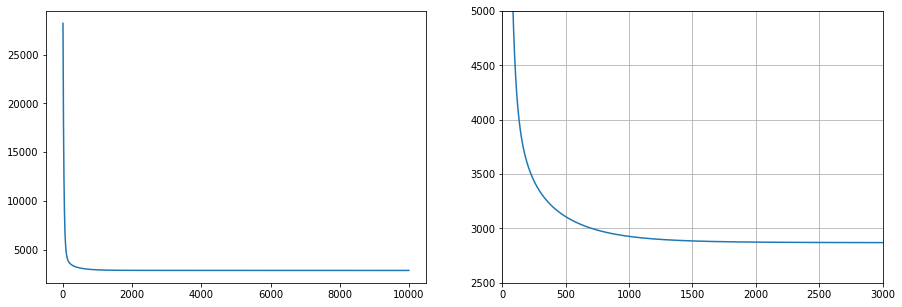

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(losses)
plt.subplot(122)
plt.plot(losses)
plt.xlim(0,3000)
plt.ylim(2500,5000)
plt.grid()
plt.show()

### 10. test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.

In [ ]:
pred = model(X_test, w, b)
test_loss = MSE_loss(X_test, w, b, y_test)
print("테스트 loss :", test_loss)

테스트 loss : 2940.310847774125


### 11. 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

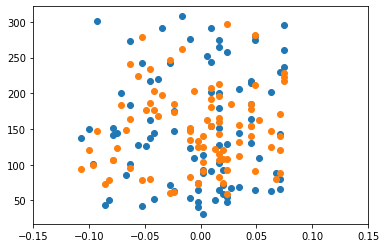

In [ ]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], pred)
plt.xlim(-0.15, 0.15)
plt.show()

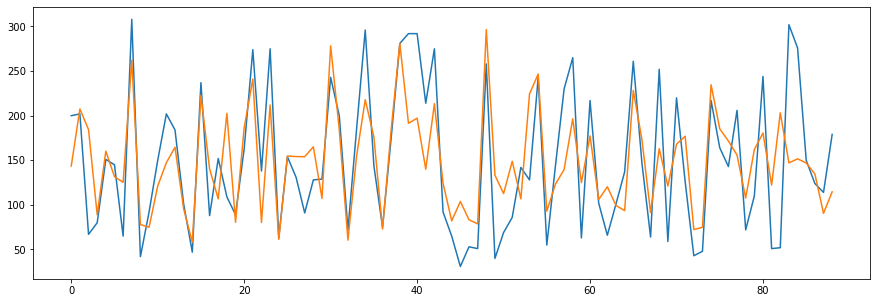

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(list(range(len(y_test))), y_test)
plt.plot(list(range(len(y_test))), pred)
plt.show()

In [ ]:
mean_target = df['target'].sum() / len(df['target'])
print("데이터셋 당뇨병 수치 총합 :", df['target'].sum())
print("데이터셋 샘플 수 :", len(df['target']))
print("데이터셋 평균 당뇨병 수치 :", mean_target)

데이터셋 당뇨병 수치 총합 : 67243.0
데이터셋 샘플 수 : 442
데이터셋 평균 당뇨병 수치 : 152.13348416289594


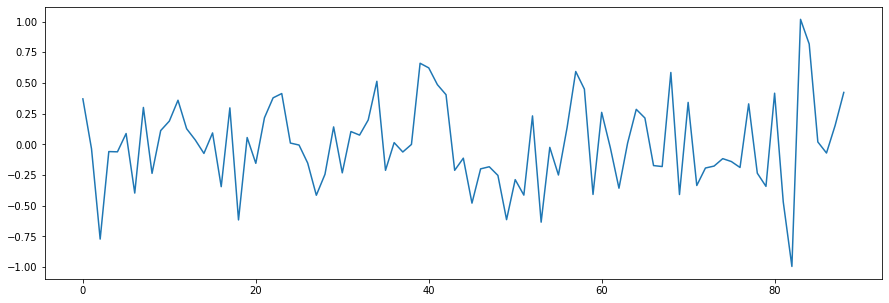

In [ ]:
err = (y_test - pred) / mean_target

plt.figure(figsize=(15, 5))
plt.plot(list(range(len(y_test))), err)
plt.show()

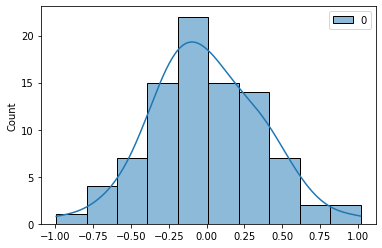

In [ ]:
sns.histplot(data=err, kde=True)
plt.show()

### 모델 학습 및 평가
- 모델 평가
  - 10 by 1 단층 FCNN 모델에 mse loss를 적용한 Linear Regression을 수행하였음.
  - 모델 학습 과정에서 learning rate 0.01에 대하여 700 Epoch에 mse loss 3000, 2000 Epoch에 mse loss 2875에 도달하였음.
  - test 데이터셋에 대해 mse loss 2940으로 루브릭 목표 mse loss 3000 이하를 달성하였음.
  - mse loss로는 예측 정확도를 판별하기 어려워 전체 샘플의 당뇨병 수치 평균 값을 기준으로 test 데이터 당뇨병 수치의 예측 오차를 정규화하였음.
  - 성능이 매우 좋지 않음.
  - 그래프에서 오차 값이 최대 1에 도달하는 경우도 있으며 에러의 분산이 너무 넓게 분포함.  

### 회고
- 모델이 너무 단순하여 예측 성능이 좋지 않다고 생각함.
- 대략적으로 데이터에 대한 분석을 하였으나 관련 의학 지식이 전무한 상태이기 때문에 어설프게 입력 데이터를 변형하거나 입력 데이터를 제외하는 것은 올바른 방법이 아니라고 생각함. 또 다른 이유로 입력 데이터의 차원이 낮기 때문에 일부 입력 데이터를 제외하는 것은 좋지 않다고 생각함.
- 이에 대한 대안으로 모델은 조금 더 깊게 쌓으면 데이터 전처리 없이도 정확한 예측이 가능할 것으로 예상함.
- 나중에 딥러닝 진도가 더 나가면 시도해보도록 하겠음.

# 문제 정의
- 문제의 종류 
  - 여러 입력 파라미터로부터 자전거 대여 수를 예측하는 Linear Regression 문제
- 입력 데이터
  - datetime : 날짜
  - season : 계절
  - holiday : 공휴일
  - workingday : 평일/(휴일+공휴일)
  - weather : 세부적인 기상 상황  
  - temp : 온도(단위, Celsius)  
  - atemp : 체감 온도(단위, Celsius)  
  - humidity : 상대 습도  
  - windspeed : 풍속  
  - casual : 비회원제 렌탈 수  
  - registered : 회원제 렌탈 수  
- 출력 데이터
  - count : 전체 렌탈 수     

# 데이터 수집 및 레이블링(과정1)
- kaggle의 bike-sharing-demand dataset 사용
- data와 label이 정리된 dataset을 사용

# 데이터 전처리 및 분석(과정2~4)
- 데이터 EDA
  - 데이터 설명
  - 데이터 차원
  - 데이터 수치 범위
  - 데이터 타입
  - 공백 여부
  - 상관관계
- 데이터 전처리
  - train/test 데이터셋 분배

# 가설
- 가설 수립

# 학습 및 평가(과정5~7)
- train 데이터셋을 이용한 모델 학습
- test 데이터셋 평가

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. 데이터 가져오기
- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
import io

# data_path = "G:/내 드라이브/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/2강/dataset/train.csv"

train = pd.read_csv(io.BytesIO(file_uploaded['train.csv']))
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
print(train.shape)

(10886, 12)


### 데이터 EDA
- 데이터 설명  
  - 2년 동안 수집한 자전거 렌탈 데이터를 사용한다.  
  - 트레이닝 셋은 매 월 1~19일의 렌탈 데이터를 제공하며  
  - 테스트 셋은 매 월 20~월말의 렌탈 데이터를 제공한다.  
  - 입력 데이터
    - datetime : 년/월/일/시/분/초로 구성  
    - season : 계절을 카테고리 값으로 표시(1 = spring, 2 = summer, 3 = fall, 4 = winter)  
    - holiday : 공휴일을 카테고리 값으로 표시(0 = workingday, 1 = holiday)  
    - workingday : 평일/(휴일+공휴일)을 카테고리 값으로 표시(0 = holiday, 1 = workingday)  
    - weather : 세부적인 기상 상황을 카테고리 값으로 표시  
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
    - temp : 온도(단위, Celsius)  
    - atemp : 체감 온도(단위, Celsius)  
    - humidity : 상대 습도  
    - windspeed : 풍속  
    - casual : 비회원제 렌탈 수  
    - registered : 회원제 렌탈 수  
  - 출력 데이터
    - count : 전체 렌탈 수     
- 데이터 차원
  - 10886 by 12
  - 10886개 샘플 by (11개 항목의 input 데이터 + target 데이터)
- 데이터 수치 범위
  - 정규화 되지 않음.
- 데이터 타입
  - 입력 데이터 : 정수형, 소수형, 문자열 자료
  - 출력 데이터 : 정수형 자료
- 공백 여부 
  - 공백 없음.
- 상관관계
  - count와 registered 사이에는 아주 강한 상관관계가 있음.
  - count와 casual 사이에는 강한 상관관계가 있음.
  - registered + casual은 count와 동일하기 때문에 학습 및 테스트에 사용 시 정답을 제공하는 것과 동일함. 따라서 입력 데이터에서 제거.
  - temp와 atemp 사이에는 아주 강한 상관관계가 있음. 온도와 체감온도는 큰 차이가 있는 개념이 아니므로 하나만 써도 무방할 듯함.
  - count와 atemp, temp는 양의 상관관계 count와 humidity는 음의 상관관계가 있는 것으로 보아 맑고 습하지 않은 날씨에 자전거 타기를 선호하는 듯 함.
  - season과 weather은 categorical 값이기 때문에 실제로 입력 파라미터 사이에 나타나야할 상관관계가 보이지 않음. regression 작업을 위해 categorical 값을 one-hot 인코딩으로 변경하는 것이 좋아 보임.

### 데이터 전처리
- train/test 데이터셋을 랜덤 셔플링 후 8:2로 배분함.
- train/test 데이터셋의 배분은 보통 7:3 근처에서 이루어지는 것 같음.

In [ ]:
train.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
print(train.datetime)
print(train.datetime.shape)

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object
(10886,)


In [ ]:
print(train.season)
print(train.season.unique())
print(train.season.shape)

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: int64
[1 2 3 4]
(10886,)


In [ ]:
print(train.holiday)
print(train.holiday.unique())
print(train.holiday.shape)
print(train.holiday.value_counts())

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: holiday, Length: 10886, dtype: int64
[0 1]
(10886,)
0    10575
1      311
Name: holiday, dtype: int64


In [ ]:
print(train.workingday)
print(train.workingday.unique())
print(train.workingday.shape)
print(train.workingday.value_counts())

0        0
1        0
2        0
3        0
4        0
        ..
10881    1
10882    1
10883    1
10884    1
10885    1
Name: workingday, Length: 10886, dtype: int64
[0 1]
(10886,)
1    7412
0    3474
Name: workingday, dtype: int64


In [ ]:
print(train.weather)
print(train.weather.unique())
print(train.weather.shape)

0        1
1        1
2        1
3        1
4        1
        ..
10881    1
10882    1
10883    1
10884    1
10885    1
Name: weather, Length: 10886, dtype: int64
[1 2 3 4]
(10886,)


In [ ]:
print(train.temp)
print(train.temp.unique())
print(train.temp.shape)

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
         ...  
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temp, Length: 10886, dtype: float64
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
(10886,)


In [ ]:
print(train.atemp)
print(train.atemp.unique())
print(train.atemp.shape)

0        14.395
1        13.635
2        13.635
3        14.395
4        14.395
          ...  
10881    19.695
10882    17.425
10883    15.910
10884    17.425
10885    16.665
Name: atemp, Length: 10886, dtype: float64
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]
(10886,)


In [ ]:
print(train.humidity)
print(train.humidity.unique())
print(train.humidity.shape)

0        81
1        80
2        80
3        75
4        75
         ..
10881    50
10882    57
10883    61
10884    61
10885    66
Name: humidity, Length: 10886, dtype: int64
[ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  47  50  43  40  35  30  32  64  69  55  59  63  68  74  51  56  52
  49  48  37  33  28  38  36  93  29  53  34  54  41  45  92  62  58  61
  60  65  70  27  25  26  31  73  21  24  23  22  19  15  67  10   8  12
  14  13  17  16  18  20  85   0  83  84  78  79  89  97  90  96  91]
(10886,)


In [ ]:
print(train.windspeed)
print(train.windspeed.unique())
print(train.windspeed.shape)

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 10886, dtype: float64
[ 0.      6.0032 16.9979 19.0012 19.9995 12.998  15.0013  8.9981 11.0014
 22.0028 30.0026 23.9994 27.9993 26.0027  7.0015 32.9975 36.9974 31.0009
 35.0008 39.0007 43.9989 40.9973 51.9987 46.0022 50.0021 43.0006 56.9969
 47.9988]
(10886,)


In [ ]:
print(train.casual)
print(train.casual.unique())
print(train.casual.shape)

0         3
1         8
2         5
3         3
4         0
         ..
10881     7
10882    10
10883     4
10884    12
10885     4
Name: casual, Length: 10886, dtype: int64
[  3   8   5   0   2   1  12  26  29  47  35  40  41  15   9   6  11   4
   7  16  20  19  10  13  14  18  17  21  33  23  22  28  48  52  42  24
  30  27  32  58  62  51  25  31  59  45  73  55  68  34  38 102  84  39
  36  43  46  60  80  83  74  37  70  81 100  99  54  88  97 144 149 124
  98  50  72  57  71  67  95  90 126 174 168 170 175 138  92  56 111  89
  69 139 166 219 240 147 148  78  53  63  79 114  94  85 128  93 121 156
 135 103  44  49  64  91 119 167 181 179 161 143  75  66 109 123 113  65
  86  82 132 129 196 142 122 106  61 107 120 195 183 206 158 137  76 115
 150 188 193 180 127 154 108  96 110 112 169 131 176 134 162 153 210 118
 141 146 159 178 177 136 215 198 248 225 194 237 242 235 224 236 222  77
  87 101 145 182 171 160 133 105 104 187 221 201 205 234 185 164 200 130
 155 116 125 204 186 21

In [ ]:
print(train.registered)
print(train.registered.unique())
print(train.registered.shape)

0         13
1         32
2         27
3         10
4          1
        ... 
10881    329
10882    231
10883    164
10884    117
10885     84
Name: registered, Length: 10886, dtype: int64
[ 13  32  27  10   1   0   2   7   6  24  30  55  47  71  70  52  26  31
  25  17  16   8   4  19  46  54  73  64  67  58  43  29  20   9   5   3
  63 153  81  33  41  48  53  66 146 148 102  49  11  36  92 177  98  37
  50  79  68 202 179 110  34  87 192 109  74  65  85 186 166 127  82  40
  18  95 216 116  42  57  78  59 163 158  51  76 190 125 178  39  14  15
  56  60  90  83  69  28  35  22  12  77  44  38  75 184 174 154  97 214
  45  72 130  94 139 135 197 137 141 156 117 155 134  89  80 108  61 124
 132 196 107 114 172 165 105 119 183 175  88  62  86 170 145 217  91 195
 152  21 126 115 223 207 123 236 128 151 100 198 157 168  84  99 173 121
 159  93  23 212 111 193 103 113 122 106  96 249 218 194 213 191 142 224
 244 143 267 256 211 161 131 246 118 164 275 204 230 243 112 238 144 185
 101 222

In [ ]:
print(train.count)

<bound method DataFrame.count of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0 

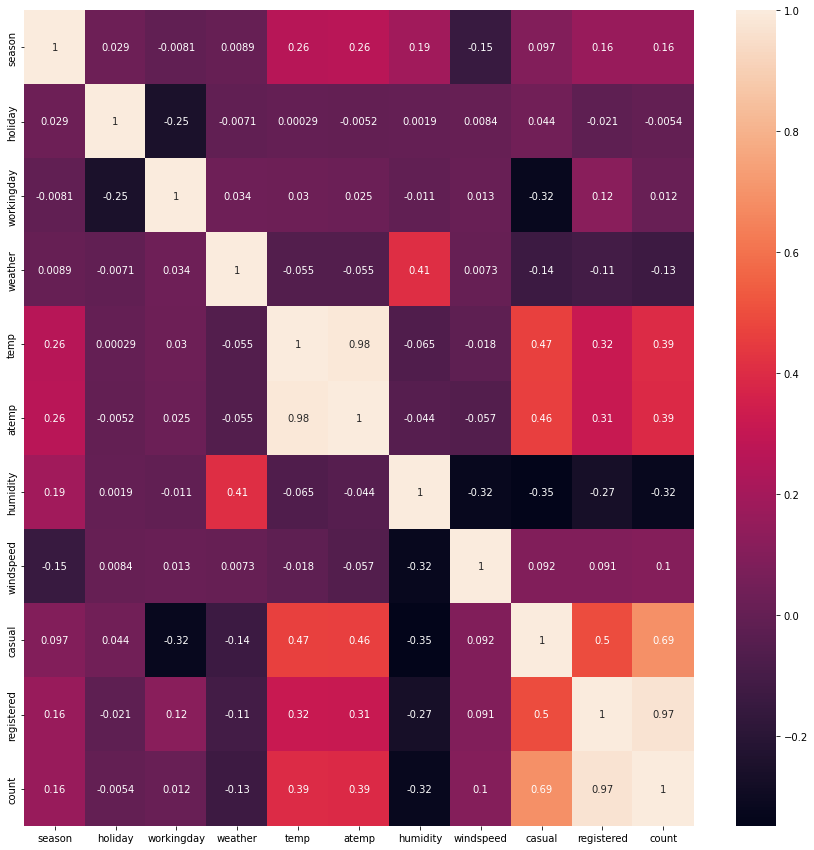

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True)

### 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

### 3. year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

[]

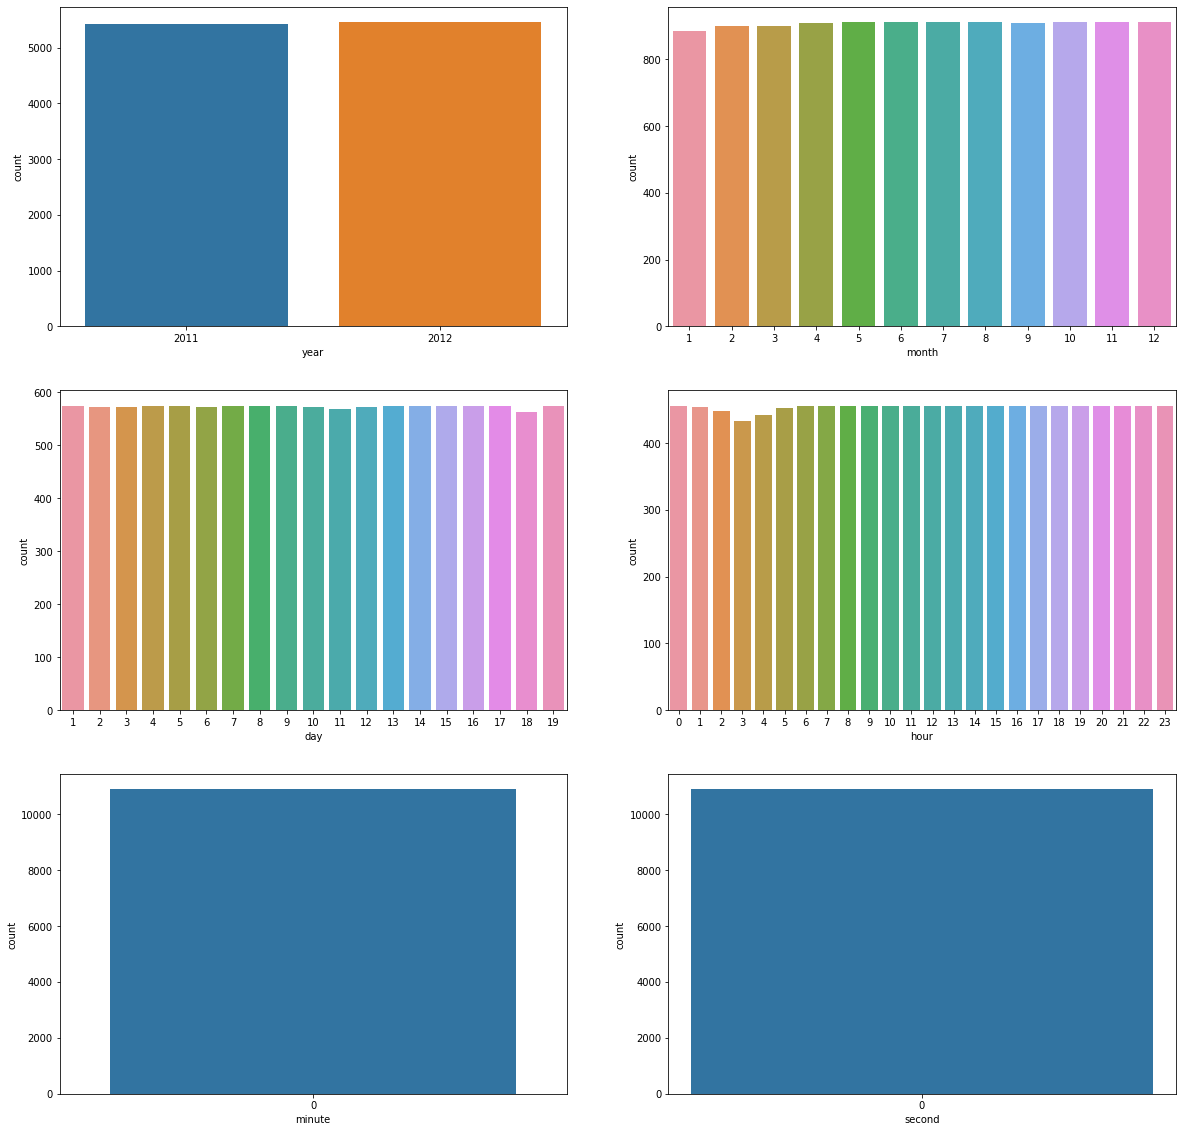

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(321)
sns.countplot(train['year'])
plt.subplot(322)
sns.countplot(train['month'])
plt.subplot(323)
sns.countplot(train['day'])
plt.subplot(324)
sns.countplot(train['hour'])
plt.subplot(325)
sns.countplot(train['minute'])
plt.subplot(326)
sns.countplot(train['second'])
plt.plot()

### 4. X, y 컬럼 선택 및 train/test 데이터 분리
- X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [ ]:
# 맨 처음 datetime은 문자열이라 제외
# 중간열에 count가 껴있고 마지막 2열에 분/초가 있기 때문에 두 행렬을 받아 하나로 합침
# casual과 resistered는 학습 및 테스트 데이터에 정답을 제공하기 때문에 제외 
X1 = train.iloc[:,1:9]
X2 = train.iloc[:,12:-2]
X = pd.concat([X1, X2], axis=1)
y = train['count']

print(X.head(10))
print(y.head(10))

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           0        1   9.84  14.395        81     0.0000   
1       1        0           0        1   9.02  13.635        80     0.0000   
2       1        0           0        1   9.02  13.635        80     0.0000   
3       1        0           0        1   9.84  14.395        75     0.0000   
4       1        0           0        1   9.84  14.395        75     0.0000   
5       1        0           0        2   9.84  12.880        75     6.0032   
6       1        0           0        1   9.02  13.635        80     0.0000   
7       1        0           0        1   8.20  12.880        86     0.0000   
8       1        0           0        1   9.84  14.395        75     0.0000   
9       1        0           0        1  13.12  17.425        76     0.0000   

   year  month  day  hour  
0  2011      1    1     0  
1  2011      1    1     1  
2  2011      1    1     2  
3  2011      1    

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708,)
(2178, 12) (2178,)


### 가설
- 상관관계 분석 결과에 따라 쾌적한 날씨일 때 자전거 대여 수가 많을 것으로 예상함.
- 날씨의 쾌적함과 시간대에 자전거 대여 수가 영향을 받을 것으로 예상함.
- 데이터 중 registered, casual, minute, second는 제외함.

### 학습 모델 설정
- sklearn의 LinearRegression 모델 사용
- Linear Regression이기 때문에 활성화 함수는 사용하지 않음.

### 5. LinearRegression 모델 학습
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

### 학습 시 유의사항
- 학습 시 casual과 resistered는 학습 및 테스트 데이터에 정답을 제공함.
- 모델이 두가지 파라미터만 가지고 결과가 도출되도록 학습하기 때문에 학습이 제대로 되지 않음.
- 두 파라미터 포함 시 loss가 0에 수렴함.

In [ ]:
pred = model.predict(X_test)
pred

array([168.26205556, 302.92615437, 358.45764734, ..., 348.56975008,
       232.28209306, -47.44043807])

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
rmse = mse**0.5
print("mse 에러 값 :", mse)
print("rmse 에러 값 :", rmse)

mse 에러 값 : 20073.458616235333
rmse 에러 값 : 141.68083362344865


### 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

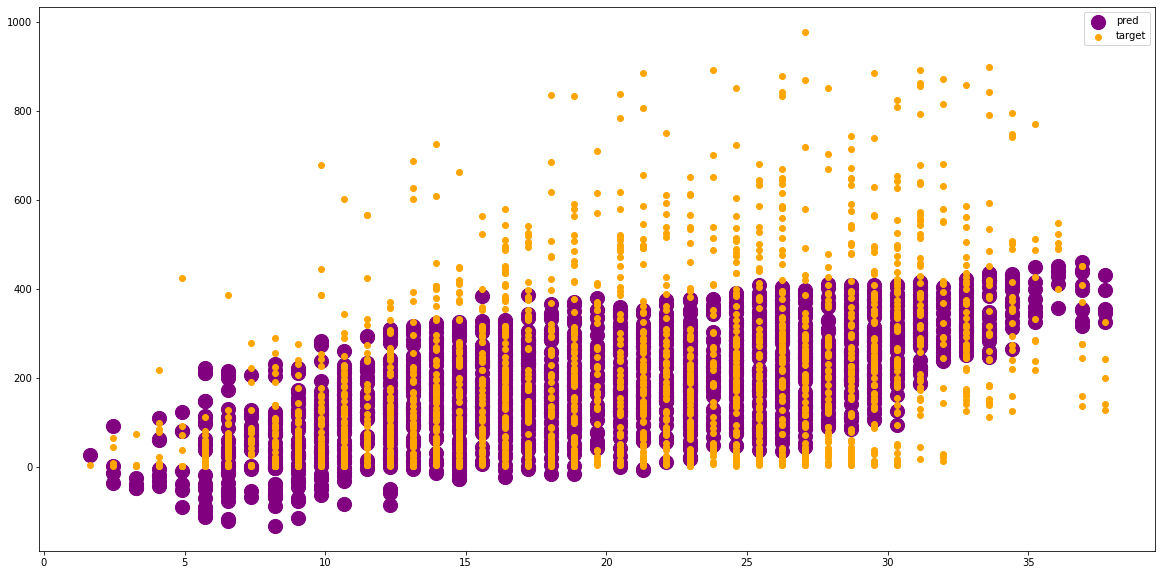

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test.temp, pred, s=200, color = 'purple', label="pred")
plt.scatter(X_test.temp, y_test, color = 'orange', label="target")

plt.legend()
plt.show()

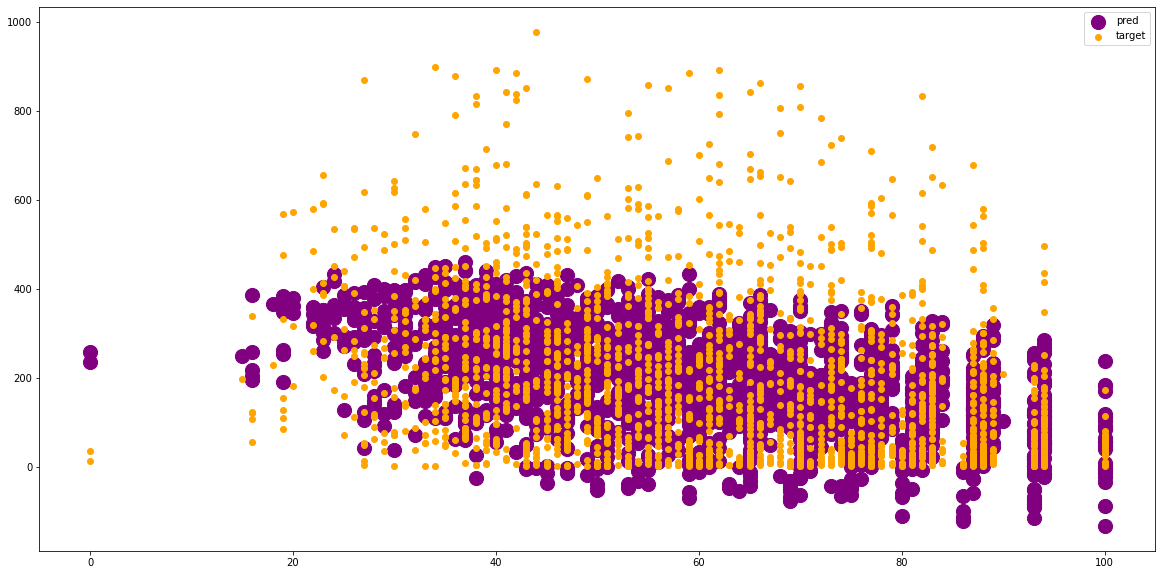

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test.humidity, pred, s=200, color = 'purple', label="pred")
plt.scatter(X_test.humidity, y_test, color = 'orange', label="target")

plt.legend()
plt.show()

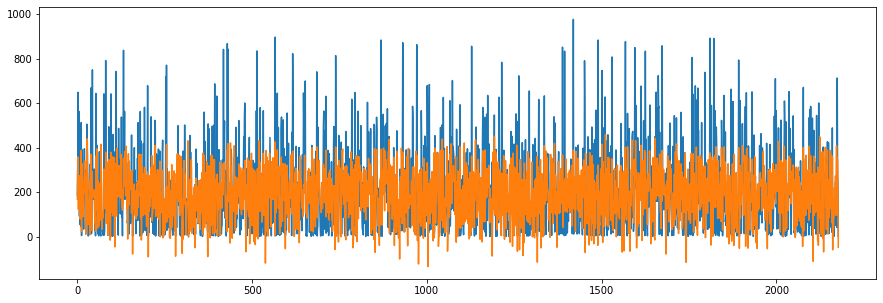

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(list(range(len(y_test))), y_test)
plt.plot(list(range(len(y_test))), pred)
plt.show()

In [ ]:
mean_target = y_test.sum() / len(y_test)
print("데이터셋 자전거 대여 수 총합 :", y_test.sum())
print("데이터셋 샘플 수 :", len(y_test))
print("데이터셋 평균 자전거 대여 수 :", mean_target)

데이터셋 자전거 대여 수 총합 : 426771
데이터셋 샘플 수 : 2178
데이터셋 평균 자전거 대여 수 : 195.94628099173553


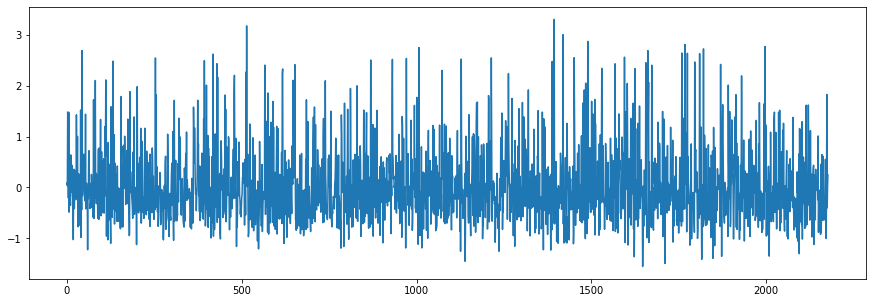

In [ ]:
err = (y_test - pred) / mean_target

plt.figure(figsize=(15, 5))
plt.plot(list(range(len(y_test))), err)
plt.show()

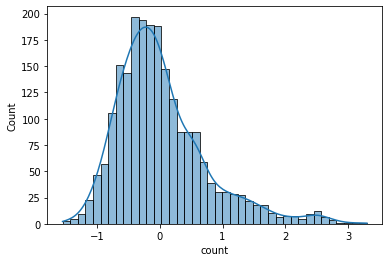

In [ ]:
sns.histplot(data=err, kde=True)
plt.show()

### 모델 학습 및 평가
- 모델 평가
  - sklearn의 LinearRegression 모델을 이용하여 학습 및 테스트를 수행하였음.
  - test 데이터셋에 대해 rmse loss 141으로 루브릭 목표 rmse loss 150 이하를 달성하였음.
  - rmse loss로는 예측 정확도를 판별하기 어려워 테스트 데이터셋의 자전거 대여 수 평균 값을 기준으로 test 데이터 자전거 대여 수의 예측 오차를 정규화하였음.
  - 성능이 매우 좋지 않음.
  - 그래프에서 오차 값이 최대 3에 도달하는 경우도 있으며 에러의 분산이 너무 넓게 분포함.  
  - 결과 분석 내용 중 온도와 습도를 x축으로 자전거 대여 수를 시각화한 내용이 있음. 학습 전 상관관계 분석으로도 알 수 있는 내용이며 단일 파라미터에 대한 결과 표시는 별 의미 있는 내용은 아니라고 생각함.

### 회고
- 모델 성능이 너무 안좋아서 모델에 대한 공식 홈페이지 설명을 읽어보았음. 알고 보니 단층으로 이루어진 선형 회귀 모델을 사용한 것임.
- 모델이 너무 단순하여 예측 성능이 좋지 않다고 생각함.
- 더 깊은 모델이 필요함.
- 나중에 딥러닝 진도가 더 나가면 시도해보도록 하겠음.